In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# helpers
def closeToZero(value):
    return abs(value) <= 1e-20

def normalize(vector):
    norm = np.linalg.norm(vector)
    return [(0 if closeToZero(elt) else elt/norm) for elt in vector]

In [ ]:
def graphLaplacianEmbedding(edgeIncidenceMatrix):
    edgeIncidenceMatrixTranspose = np.transpose(edgeIncidenceMatrix)
    graphLaplacianL = edgeIncidenceMatrix @ edgeIncidenceMatrixTranspose
    eigens = np.linalg.eig(graphLaplacianL)

    # terrible awful method
    values = [eigen for eigen in eigens.eigenvalues]
    values.sort()
    values.reverse()

    # even worse method of initializing
    smallest = 10000000000
    secondSmallest = 10000000000
    for eigen in values:
        if eigen < smallest and not closeToZero(eigen):
            secondSmallest = smallest
            smallest = eigen

    smallestIndex = list(eigens.eigenvalues).index(smallest)
    secondSmallestIndex = list(eigens.eigenvalues).index(secondSmallest)

    smallestVector = eigens.eigenvectors[smallestIndex]
    secondSmallestVector = eigens.eigenvectors[secondSmallestIndex]

    smallestNormal = normalize(smallestVector)
    secondSmallestNormal = normalize(secondSmallestVector)

    xs = []
    ys = []

    for i in range(len(edgeIncidenceMatrix)):
        xs.append(smallestNormal[i])
        ys.append(secondSmallestNormal[i])

    plt.scatter(xs, ys)
    plt.show()

In [ ]:
def generateCycleGraph(size):
    matrix = []
    for i in range(size):
        vec = [0 for j in range(size)]
        vec[i] = -1
        vec[(i+1)%size] = 1
        matrix.append(vec)
    return matrix

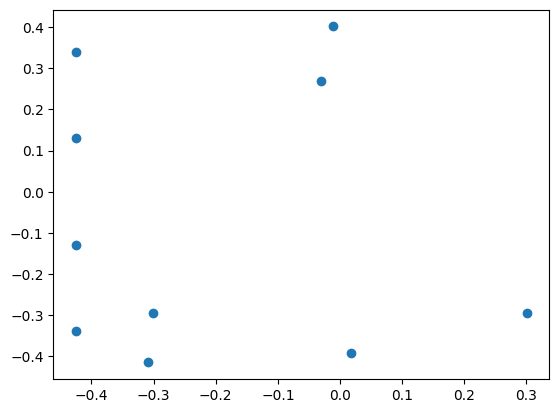

In [ ]:
graph10 = generateCycleGraph(10)
graphLaplacianEmbedding(graph10)

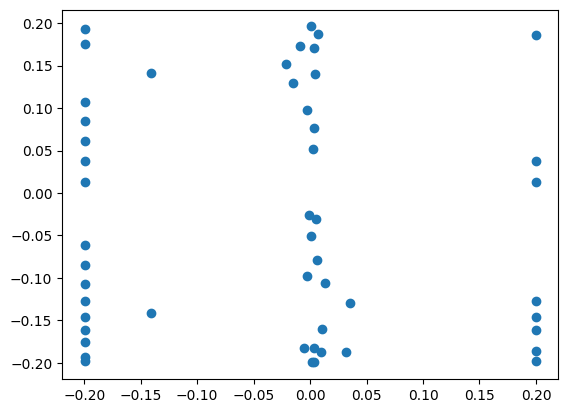

In [ ]:
graph50 = generateCycleGraph(50)
graphLaplacianEmbedding(graph50)

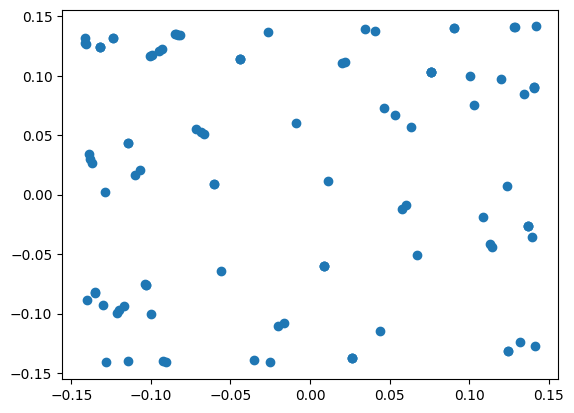

In [ ]:
graph100 = generateCycleGraph(100)
graphLaplacianEmbedding(graph100)